In [1]:
%%capture
pip install spacytextblob

In [2]:
import numpy as np 
import pandas as pd 
import spacy
from IPython.display import Markdown as md
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing the dataset
df = pd.read_csv('/content/drive/My Drive/intership_2022/final project/twitter.csv')

In [7]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1556231401992867841,1556231401992867841,2022-08-07 10:50:54 UTC,2022-08-07,10:50:54,0,919545074312187904,jojoguerr1,Valerie Guerriero,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1556230204980346883,1555654340307738630,2022-08-07 10:46:08 UTC,2022-08-07,10:46:08,0,101323237,cazbott,MummaCaragh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CeeAllTheBees', 'name': 'Bea...",NaN,NaN,NaN,NaN
2,1556229356988637189,1556229356988637189,2022-08-07 10:42:46 UTC,2022-08-07,10:42:46,0,1332096484909719557,coochiegurl420,Horrible woman,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1556228567905738754,1556034514945802242,2022-08-07 10:39:38 UTC,2022-08-07,10:39:38,0,1942168514,jayexthree,Jayexthree,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsjadeyanh', 'name': 'Jade-...",NaN,NaN,NaN,NaN
4,1556226375199076352,1556226375199076352,2022-08-07 10:30:55 UTC,2022-08-07,10:30:55,0,1423851262966059008,cruleyalexa1996,cruleyalexa1996@gmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [13]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1556231401992867841,1556231401992867841,2022-08-07 10:50:54 UTC,2022-08-07,10:50:54,0,919545074312187904,jojoguerr1,Valerie Guerriero,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1556230204980346883,1555654340307738630,2022-08-07 10:46:08 UTC,2022-08-07,10:46:08,0,101323237,cazbott,MummaCaragh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CeeAllTheBees', 'name': 'Bea...",NaN,NaN,NaN,NaN
2,1556229356988637189,1556229356988637189,2022-08-07 10:42:46 UTC,2022-08-07,10:42:46,0,1332096484909719557,coochiegurl420,Horrible woman,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1556228567905738754,1556034514945802242,2022-08-07 10:39:38 UTC,2022-08-07,10:39:38,0,1942168514,jayexthree,Jayexthree,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsjadeyanh', 'name': 'Jade-...",NaN,NaN,NaN,NaN
4,1556226375199076352,1556226375199076352,2022-08-07 10:30:55 UTC,2022-08-07,10:30:55,0,1423851262966059008,cruleyalexa1996,cruleyalexa1996@gmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1552750798903418885,1552750798903418885,2022-07-28 20:20:13 UTC,2022-07-28,20:20:13,0,199448306,kittybravofan,Kitty,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10005,1552750790460284929,1552750790460284929,2022-07-28 20:20:11 UTC,2022-07-28,20:20:11,0,990931608512450561,smoedordiee,JOHNNY DEPP STAYS WINNING,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10006,1552750702790955010,1552740610502688769,2022-07-28 20:19:50 UTC,2022-07-28,20:19:50,0,2589707786,delordrule,Samuel ÑañåKoFi ⏱,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'deffonotchaur', 'name': '\U0...",NaN,NaN,NaN,NaN
10007,1552750699317977088,1552750699317977088,2022-07-28 20:19:50 UTC,2022-07-28,20:19:50,0,1094409603100626944,kind_luna,Luna 🌙,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [9]:
df['tweet']

0        NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE Y...
1        @CeeAllTheBees @LauraBockov Men haters!! This ...
2        i'm glad people are realising johnny depp is a...
3        @itsjadeyanh I saw other people using complete...
4        #TweetOfTheDay  Milani Cosmetics Invoked Again...
                               ...                        
10004    Depp v. Heard Appeal Explained, Kate Moss Back...
10005    Amber Heard’s net worth being NEGATIVE $6.5 mi...
10006    @deffonotchaur Heard of Johnny Depp and Amber ...
10007    Amber broke Johnny down to the point of self h...
10008    @Jilleebaby @deffonotchaur How are you sure al...
Name: tweet, Length: 10009, dtype: object

 a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

In [11]:
nlp = spacy.load('en_core_web_sm')
_=nlp.add_pipe('spacytextblob')

In [12]:
#Conducting analysis only for English language tweets
tweets=df[df['language']=='en'].tweet

In [14]:
#converting it to list
tweets=tweets.to_list() 

tqdm is a library in Python which is used for creating Progress Meters or Progress Bar

In [16]:
from tqdm import tqdm

In [17]:
headers = ["Negative", "Neutral", "Positive"]

In [18]:
headers[1]

'Neutral'

In [19]:
sentiment=[]
score=[]
for i in tqdm(range(0,len(tweets))):
    score.append(nlp(tweets[i])._.polarity) #The threshold was selected based on the distribution of the values. The distribuition can be seen below
    if score[i] >= 0.1:
        index = 2
        sentiment.append(headers[index])
    elif score[i] < 0:
        index = 0
        sentiment.append(headers[index])
    else:
        index=1
        sentiment.append(headers[index])

100%|██████████| 8163/8163 [02:04<00:00, 65.48it/s]


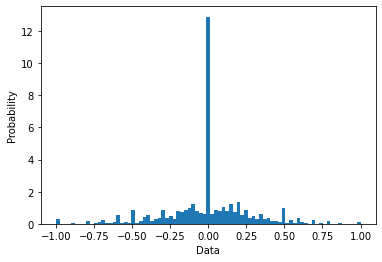

In [20]:
q25, q75 = np.percentile(score, [25, 75])
bin_width = 2 * (q75 - q25) * len(score) ** (-1/3)
bins = round((np.max(score) - np.min(score)) / bin_width)
plt.hist(score, density=True, bins=bins)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [24]:
np.unique(sentiment, return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype='<U8'),
 array([2762, 3089, 2312]))

In [25]:
data = pd.DataFrame(list(zip(tweets,score, sentiment)), columns = ['tweets','polarity', 'sentiment'])

In [26]:
len(tweets)

8163

In [27]:
len(sentiment)

8163

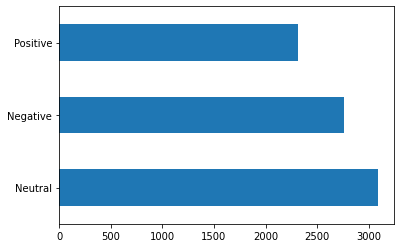

In [31]:
ax = data.sentiment.value_counts().plot.barh()

In [32]:
data

,tweets,polarity,sentiment
0,NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE Y...,-0.414773,Negative
1,@CeeAllTheBees @LauraBockov Men haters!! This ...,0.550000,Positive
2,i'm glad people are realising johnny depp is a...,-0.300000,Negative
3,@itsjadeyanh I saw other people using complete...,-0.141667,Negative
4,#TweetOfTheDay Milani Cosmetics Invoked Again...,0.000000,Neutral
...,...,...,...
8158,"Depp v. Heard Appeal Explained, Kate Moss Back...",0.000000,Neutral
8159,Amber Heard’s net worth being NEGATIVE $6.5 mi...,0.000000,Neutral
8160,@deffonotchaur Heard of Johnny Depp and Amber ...,0.000000,Neutral
8161,Amber broke Johnny down to the point of self h...,-0.076852,Negative


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweets     8163 non-null   object 
 1   polarity   8163 non-null   float64
 2   sentiment  8163 non-null   object 
dtypes: float64(1), object(2)
memory usage: 191.4+ KB


In [34]:
#Finding missing values
data.isnull().sum()

tweets       0
polarity     0
sentiment    0
dtype: int64

In [35]:
# Removing index column
data = data.dropna()

In [38]:
print(data)

                                                 tweets  polarity sentiment
0     NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE Y... -0.414773  Negative
1     @CeeAllTheBees @LauraBockov Men haters!! This ...  0.550000  Positive
2     i'm glad people are realising johnny depp is a... -0.300000  Negative
3     @itsjadeyanh I saw other people using complete... -0.141667  Negative
4     #TweetOfTheDay  Milani Cosmetics Invoked Again...  0.000000   Neutral
...                                                 ...       ...       ...
8158  Depp v. Heard Appeal Explained, Kate Moss Back...  0.000000   Neutral
8159  Amber Heard’s net worth being NEGATIVE $6.5 mi...  0.000000   Neutral
8160  @deffonotchaur Heard of Johnny Depp and Amber ...  0.000000   Neutral
8161  Amber broke Johnny down to the point of self h... -0.076852  Negative
8162  @Jilleebaby @deffonotchaur How are you sure al...  0.500000  Positive

[8163 rows x 3 columns]


In [36]:
print(data.loc[0][0])

NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE YET | Johnny Depp Trial  https://t.co/Ae4MQeCCyd via @YouTube


In [39]:
# Let us take text to understand process of data preprocessing in NLP
text="NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE YET | Johnny Depp Trial  https://t.co/Ae4MQeCCyd via @YouTube"

In [42]:
# First step: cleaning Text and removing number and punctuation marks.
import re
tweets = re.sub('[^a-zA-Z]', ' ', data['tweets'][0])
print(text)
print('-------------------------------------------------')
print('Review after removing number and punctuation marks. ')
print(tweets)

NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE YET | Johnny Depp Trial  https://t.co/Ae4MQeCCyd via @YouTube
-------------------------------------------------
Review after removing number and punctuation marks. 
NEW FOOTAGE  Amber Heard CAUGHT in WORST LIE YET   Johnny Depp Trial  https   t co Ae MQeCCyd via  YouTube


In [43]:
# Second  step: converting text into lower case.
tweets=tweets.lower()
print(text)
print('-------------------------------------------------')
print('Text after convering into lower case')
print(tweets)

NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE YET | Johnny Depp Trial  https://t.co/Ae4MQeCCyd via @YouTube
-------------------------------------------------
Text after convering into lower case
new footage  amber heard caught in worst lie yet   johnny depp trial  https   t co ae mqeccyd via  youtube


In [45]:
# Third step: Removing stop words like 'this, the'
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
tweets = tweets.split()
print(tweets)

['new', 'footage', 'amber', 'heard', 'caught', 'in', 'worst', 'lie', 'yet', 'johnny', 'depp', 'trial', 'https', 't', 'co', 'ae', 'mqeccyd', 'via', 'youtube']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Third step: Removing stop words like 'this, the'
# set function is generally used for long article to fasten process
review1 = [word for word in tweets if not word in set(stopwords.words('english'))]
print('Text after removing stop words')
print(review1)

Text after removing stop words
['new', 'footage', 'amber', 'heard', 'caught', 'worst', 'lie', 'yet', 'johnny', 'depp', 'trial', 'https', 'co', 'ae', 'mqeccyd', 'via', 'youtube']


In [47]:
# Fourth step: converting stemming words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
print('After converting stemmer words')
print(review)

After converting stemmer words
['new', 'footag', 'amber', 'heard', 'caught', 'worst', 'lie', 'yet', 'johnni', 'depp', 'trial', 'http', 'co', 'ae', 'mqeccyd', 'via', 'youtub']


In [48]:
# joining these words of list
review2 = ' '.join(review)
print(review2)

new footag amber heard caught worst lie yet johnni depp trial http co ae mqeccyd via youtub


In [49]:
# Creating the Bag of Words model
corpus1 = []
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(review2)
corpus1.append(review2)
print(corpus1)
X = cv.fit_transform(corpus1).toarray()
print(X)

new footag amber heard caught worst lie yet johnni depp trial http co ae mqeccyd via youtub
['new footag amber heard caught worst lie yet johnni depp trial http co ae mqeccyd via youtub']
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:
# Cleaning the texts for all review using for loop
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, data.shape[0]):
    tweets = re.sub('[^a-zA-Z]', ' ', data.iloc[:,0][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    ps = PorterStemmer()
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    print(tweets)
    corpus.append(tweets)
    #up to string

In [54]:
#    Adding corpus to csv 

tweets_dataset = pd.DataFrame(corpus)
tweets_dataset['tweets'] = tweets_dataset
tweets_dataset = tweets_dataset.drop([0], axis = 1) 
tweets_dataset.to_csv('/content/drive/My Drive/intership_2022/final project/corpus_dataset.csv')

In [55]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['sentiment']= label_encoder.fit_transform(data['sentiment'])

data['sentiment'].unique()


array([0, 2, 1])

In [56]:
data

,tweets,polarity,sentiment
0,NEW FOOTAGE! Amber Heard CAUGHT in WORST LIE Y...,-0.414773,0
1,@CeeAllTheBees @LauraBockov Men haters!! This ...,0.550000,2
2,i'm glad people are realising johnny depp is a...,-0.300000,0
3,@itsjadeyanh I saw other people using complete...,-0.141667,0
4,#TweetOfTheDay Milani Cosmetics Invoked Again...,0.000000,1
...,...,...,...
8158,"Depp v. Heard Appeal Explained, Kate Moss Back...",0.000000,1
8159,Amber Heard’s net worth being NEGATIVE $6.5 mi...,0.000000,1
8160,@deffonotchaur Heard of Johnny Depp and Amber ...,0.000000,1
8161,Amber broke Johnny down to the point of self h...,-0.076852,0


In [127]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(cv)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

CountVectorizer(max_features=1500)


In [58]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
y

array([0, 2, 0, ..., 1, 0, 2])

In [128]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [61]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
y_test

array([0, 0, 1, ..., 2, 1, 1])

we have succesfully created model now we have to apply diffrent algo

NLTK model

In [129]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [110]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [130]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 61.42


In [131]:
# save the model to disk
import joblib
filename = '/content/drive/My Drive/intership_2022/final project/NLP_model_naivebased.sav'
joblib.dump(classifier, filename)

['/content/drive/My Drive/intership_2022/final project/NLP_model_naivebased.sav']

In [132]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/intership_2022/final project/NLP_model_naivebased.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [114]:
# Load the pickled model 
import pickle 
model = pickle.load(open('/content/drive/My Drive/intership_2022/final project/NLP_model_naivebased.pkl','rb'))  
# Use the loaded pickled model to make predictions 
#model.predict(X_test)

In [115]:
# some time later...
 
# load the model from disk
naive_bayes_model = joblib.load(filename)
# result = naive_bayes_model.score(X_test, y_test)
# print(result)
tweets = "taken peopl still put blame men" #@param {type:"string"}
input_data = [tweets] 
  
input_data = cv.transform(input_data).toarray()

# print(input_data)

input_pred = classifier.predict(input_data)

input_pred = input_pred.astype(int)
print(input_pred)


if input_pred[0]==2:
  print("Tweets is Positive")
  
elif input_pred[0]==1:    
  print("Tweets is Neutral")
else:
    print("Tweets is Negative")

[1]
Tweets is Neutral


Now moving towards 2nd model

dession tree

now next model

liner regression

In [122]:
# # Fitting Simple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)    # supervised ml becouse passing dependent or indeprndent varibal

In [123]:
# y_pred = regressor.predict(X_test)
# print(y_pred)

In [124]:
# import pickle 
# print("[INFO] Saving model...")
# # Save the trained model as a pickle string. 
# saved_model=pickle.dump(regressor,open('/content/drive/My Drive/intership_2022/final project/linearregression.pkl', 'wb')) 
# # Saving model to disk

In [125]:
# # Load the pickled model 
# import pickle
# model = pickle.load(open('/content/drive/My Drive/intership_2022/final project/linearregression.pkl','rb'))  
# # Use the loaded pickled model to make predictions 
# model.predict(X_test)

In [126]:
# import joblib
# filename = '/content/drive/My Drive/intership_2022/final project/linearregression1.sav'
# joblib.dump(regressor, filename)
 
# # some time later...
 
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, y_test)

In [89]:
# Exp1 = "taken peopl still put blame men" #@param {type:"string"}



# output= loaded_model.predict([[Exp1]])
# print("Salary for given exp:", output)

In [90]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
%mkdir templates -p

In [139]:
%%writefile templates/index.html
<!doctype html>
<html lang="en">

<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Placement Predictor</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/css/bootstrap.min.css" rel="stylesheet"
        integrity="sha384-gH2yIJqKdNHPEq0n4Mqa/HGKIhSkIHeL5AyhkYV8i59U5AR6csBvApHHNl/vI1Bx" crossorigin="anonymous">

    <style>
        *{
            margin: 0;
            padding: 0;
        }
        h2,h4 {
            text-align: center;
        }

        p {
            font-family: Verdana, Geneva, Tahoma, sans-serif;
            text-align: center;
            padding-top: 10px;
            padding-bottom: 5px;
            color: #000;
        }

        .form1 {
            /* background: #000000; */
            display: flex;
            justify-content: center;
            align-items: center;
            height: fit-content;
            flex-direction: column;
            /* width: 500px; */
            border-left-width: 250px;
            border: 2px solid #ccc;
            /* padding: 30px; */
            background: #000;
            
        }

        .row{
            width: 500px;
            
        }

        .head {
            color: #000;
            background-color: yellow;
            vertical-align: top;
            font-size: 40px;
            
            
        }

        .tail {
            padding-top: 27px;
            color: #000;
            background-color: yellow;
            vertical-align: bottom;
        }

        .ans {
            color: #ffffff;
        }

        button{
            width: 200px;
            margin-top: 15px;
        }

        /* style="color: #FFF;background-color: #000;" */
    </style>
</head>

<body>
    <div class="head">
        <marquee behavior="  " direction="left ">  Internship Project</marquee>
        <p style="font-size: 25px;">
            This is a Placement Predictor Internship project
        </p>

        
    </div>

    <div class="form1">
        <form action="{{ url_for('predict')}} "method="get" class="row g-3 my-4">





            <div class="col-12" style="color: #FFF;">
                <label for="text" class="form-label"><h4>Writte Tweets </h4></label>
                <input type="text" class="form-control" id="tweets" name="tweets" step="any" required="required" placeholder="Enter the Tweets">
            </div>

             <!-- <input type="number" class="form-control" id="exp" name="exp" step="any" min="0" max="100" placeholder="0" required="required">
            <label for="floatingInput"><h6>Enter experince in years</h6></label>  -->





            <div class="col-12">
                <button type="submit" class="btn btn-outline-danger">Naive Bayes Classifier</button>
            </div>

            <div class="col-12">
                <button type="submit" class="btn btn-outline-danger">Decision Tree Classifer</button>
            </div>

            <div class="col-12">
                <button type="submit" class="btn btn-outline-danger">KNN Classifer</button>
            </div>

            <div class="col-12">
                <button type="submit" class="btn btn-outline-danger">Kernel SVM CLassifer</button>
            </div>

            <div class="col-12">
                <button type="submit" class="btn btn-outline-danger">SVM Classifer</button>
            </div>

            <div class="col-12">
                <button type="submit" class="btn btn-outline-danger">RANdom Forest Classifer</button>
            </div>
        </form>
        
        
        <p style="color: #FFF;">
          {{prediction_text}}
        </p>

    </div>
    
    <div class="tail">
        <h4>
            This Model is Developed by Ishu Kumar
        </h4>

    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/js/bootstrap.bundle.min.js"
        integrity="sha384-A3rJD856KowSb7dwlZdYEkO39Gagi7vIsF0jrRAoQmDKKtQBHUuLZ9AsSv4jD4Xa"
        crossorigin="anonymous"></script>
</body>

</html>

Overwriting templates/index.html


In [93]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=72ebbef9946a587abe0af87edd7b6a2a633b0efb808dfbce2a138a398eafa129
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [94]:
!ngrok authtoken 2CT4L1Qz5Kjm1ApbwHixPZkJ9cv_5pCAaY2RemGBmeLEvc2yc

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [138]:
import numpy as np
from flask import Flask, request, jsonify, render_template           # render_template it is used to redirect
from flask_ngrok import run_with_ngrok
import pickle
from PIL import Image
#import streamlit as st 
import matplotlib.pyplot as plt
import pandas as pd
#st.set_option('deprecation.showfileUploaderEncoding', False)


app = Flask(__name__)
model = pickle.load(open('/content/drive/My Drive/intership_2022/final project/NLP_model_naivebased.pkl','rb')) 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(cv)
corpus=pd.read_csv('/content/drive/My Drive/intership_2022/final project/corpus_dataset.csv')
corpus1=corpus['tweets'].tolist()
X = cv.fit_transform(corpus1).toarray()

#for globaly ngrok used
run_with_ngrok(app)

@app.route('/')     # it is a deacouterator
def home():
  
    return render_template("index.html")
  
@app.route('/predict',methods=['GET'])
def predict():
    
    
    '''
    For rendering results on HTML GUI
    '''
    tweets = request.args.get('tweets')
    
    tweets=[tweets]

    input_data = cv.transform(tweets).toarray()

    prediction = model.predict(input_data)

    #input_pred = input_pred.astype(int)
    
    if prediction[0]==2:
      return render_template('index.html', prediction_text='Tweets is Positive')
      
    elif prediction[0]==1:    
      return render_template('index.html', prediction_text='Tweets is Negative')
    else:
      return render_template('index.html', prediction_text='Tweets is Netural')
      



app.run()

CountVectorizer(max_features=1500)
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://abdf-34-80-3-220.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [08/Aug/2022 06:56:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Aug/2022 06:56:22] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Aug/2022 06:56:27] "GET /predict?tweets=taken+peopl+still+put+blame+men HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Aug/2022 06:56:32] "GET /predict?tweets=taken+peopl+still+put+blame+men HTTP/1.1" 200 -
